[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1q71mw_g4Oldak1bah4GcM-gVNeiIAKGz?usp=sharing)

## Loading and analysing Fashion MNIST dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


## An overview of the images


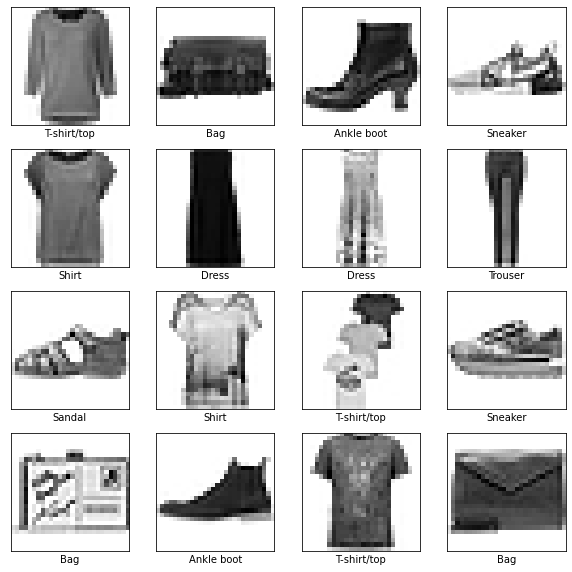

In [ ]:
# Get 16 images at random
import random
random.seed(1)
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 16)

plt.figure(figsize=(10, 10))

for i in range(len(sampler)):
 plt.subplot(4,4,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[sampler[i]], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[sampler[i]]])
plt.show()


## Build, compile and train the model

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                           
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(64, activation='relu'),                              
  tf.keras.layers.Dense(10),                             
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(
    train_dataset,
    epochs=10, 
    validation_data=validation_dataset)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.5497 - accuracy: 0.8094 - val_loss: 0.4717 - val_accuracy: 0.8376
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3933 - accuracy: 0.8604 - val_loss: 0.4035 - val_accuracy: 0.8550
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3555 - accuracy: 0.8711 - val_loss: 0.3727 - val_accuracy: 0.8660
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3249 - accuracy: 0.8813 - val_loss: 0.3780 - val_accuracy: 0.8652
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3046 - accuracy: 0.8886 - val_loss: 0.3577 - val_accuracy: 0.8734
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2918 - accuracy: 0.8918 - val_loss: 0.3572 - val_accuracy: 0.8672
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2781 - accuracy: 0.8975 - val_loss: 0.3449 - val_accuracy: 0.8742
Epoch 

## Make predictions


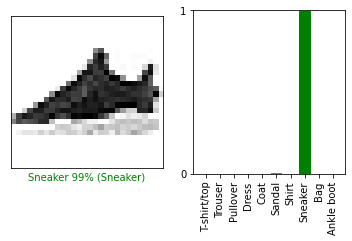

In [ ]:
image_id = 1024 # Pick an image id between 0 and 9999 inclusive

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(range(10))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_id, predictions[image_id], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_id, predictions[image_id],  test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()